In [5]:
# load the overlay
from pynq import Overlay
Overlay("base.bit").download()

from pynq.drivers.video import HDMI
import cv2

hdmi_out = HDMI('out')
hdmi_out.start()
hdmi_out.mode(HDMI.VMODE_640x480)
hdmi_out.start()

frame_out_w = 1920
frame_out_h = 1080

frame_in_w = 640
frame_in_h = 480

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


In [6]:
import numpy as np
ret, frame_vga = videoIn.read()

if (ret):
    frame_1080p = np.zeros((1080,1920,3)).astype(np.uint8)
    frame_1080p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    hdmi_out.frame_raw(bytearray(frame_1080p.astype(np.int8)))
else:
    raise RuntimeError("Error while reading from camera.")

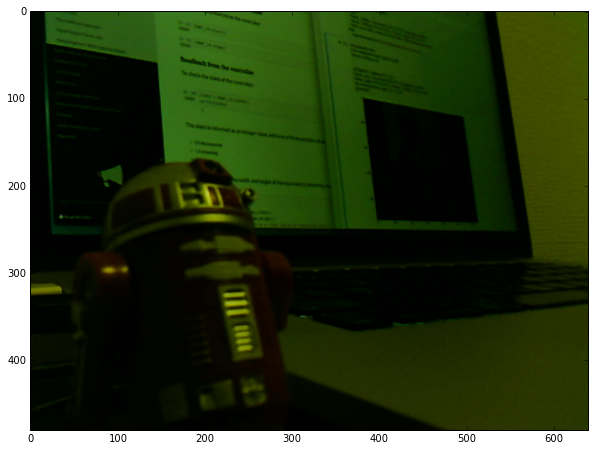

In [8]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np


plt.figure(1, figsize=(10, 10))
frame_vga = np.zeros((480,640,3)).astype(np.uint8)
frame_vga[0:480,0:640] = frame_1080p[0:480,0:640]
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()

In [9]:
videoIn.release()
hdmi_out.stop()
del hdmi_out